# Topic: Correlation between student health and academic performance
### Group 7: Bansri Patel, Justin Yee, Kapilan Ramasamy, Nathaniel Morales, Shreya Agarwal

### 1. What data do you have?
## The data we have is voluntarily provided survey data from 256 current UCR undergraduate students. 
The data points relevant to us are as follows: 
- Overall UCR gpa 
- Do you prioritize health (Y/N) 
- Health vs Academic studies (scale of 1-5) 
- Mental wellbeing (scale of 1-5) 
- Did you face imposter syndrome in high school (scale of 1-5) 
- Imposter syndrome freshman - senior year at UCR (scale of 1-5) 
- Do you face financial stresses at UCR (scale of 1-5) 


### 2. What would you like to know?
In this mini-project, the aim is to investigate the correlation between students' health priorities and academic performance, focusing specifically on the impact of mental health and imposter syndrome. The study seeks to understand whether students who prioritize their mental health exhibit a significant correlation with higher GPAs and how imposter syndrome may affect academic achievement. By exploring these relationships, the project aims to provide insights into the intricate relationship between well-being, mindset, and academic success, contributing to a more comprehensive understanding of factors influencing students' overall performance.

### 3. Explore and present the data. (Generate statistics, perform visualizations)

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr, pearsonr, spearmanr

                   Average_GPA
prioritize_health             
0.0                   3.472222
1.0                   3.451754


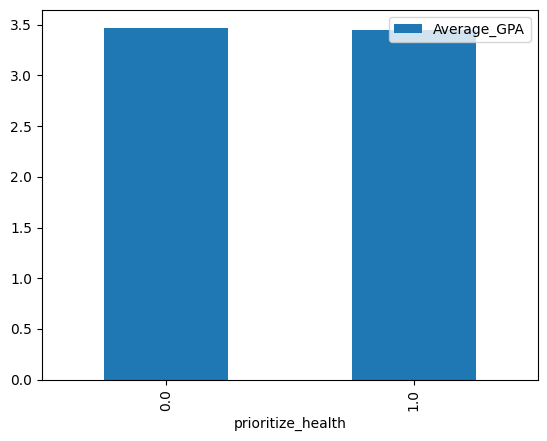

In [2]:
# Load the data
df = pd.read_csv('data.csv')

# Convert prioritize_health to numerical values
df['prioritize_health'] = df['prioritize_health'].apply(lambda x: 1 if x == 'Yes' else 0).astype(float)

# Format the GPA column
df['UCR_GPA'] = df['UCR_GPA'].str.replace('Below 2.0', '').str.replace('Prefer not to say', '')
# Split the GPA column into two new columns
df[['Lower_GPA', 'Upper_GPA']] = df['UCR_GPA'].str.split(' - ', expand=True)

# Convert the new columns to numerical values
df['Lower_GPA'] = pd.to_numeric(df['Lower_GPA'].replace('Below', '2.0'))
df['Upper_GPA'] = pd.to_numeric(df['Upper_GPA'].replace('Below', '2.0'))

# Calculate the average GPA
df['Average_GPA'] = (df['Lower_GPA'] + df['Upper_GPA']) / 2

# Create a list of imposter syndrome columns for different grade levels
imposter_syndrome_columns = ['imposter_syndrome_freshman', 'imposter_syndrome_sophomore', 'imposter_syndrome_junior', 'imposter_syndrome_senior', 'imposter_syndrome_graduate']

# Calculate the mean imposter syndrome score across grade levels
df['mean_imposter_syndrome'] = df[imposter_syndrome_columns].mean(axis=1)

# pivot table showing average GPA for students who prioritize health, and students who do not prioritize health.
health_priority_gpa = df.pivot_table(index=['prioritize_health'], values=['Average_GPA'], aggfunc='mean')

# Bar plot of the average GPA of students who prioritize health compared to who do not 
health_priority_gpa.plot(kind = 'bar')
print(health_priority_gpa)

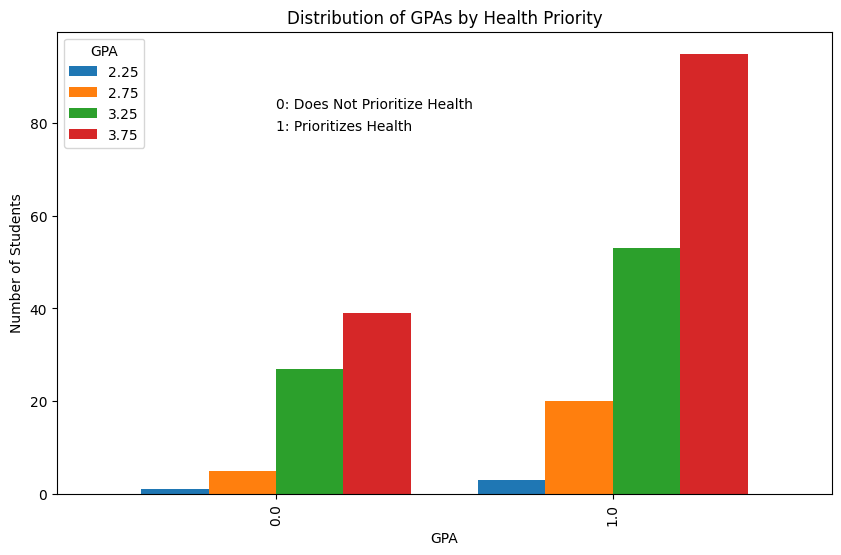

In [3]:
# Bar plot that shows the gpas of students who prioritize health and students who don't 

group_health_gpa = df.groupby(["prioritize_health", "Average_GPA"])["prioritize_health"].count().unstack()


ax = group_health_gpa.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Distribution of GPAs by Health Priority')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.legend(title='GPA', labels=['2.25', '2.75','3.25','3.75'])

plt.text(0, group_health_gpa.max().max() * 0.9, '0: Does Not Prioritize Health', ha='left', va='top')
plt.text(0, group_health_gpa.max().max() * 0.85, '1: Prioritizes Health', ha='left', va='top')

plt.show()

prioritize_health
0.0     78
1.0    177
Name: prioritize_health, dtype: int64


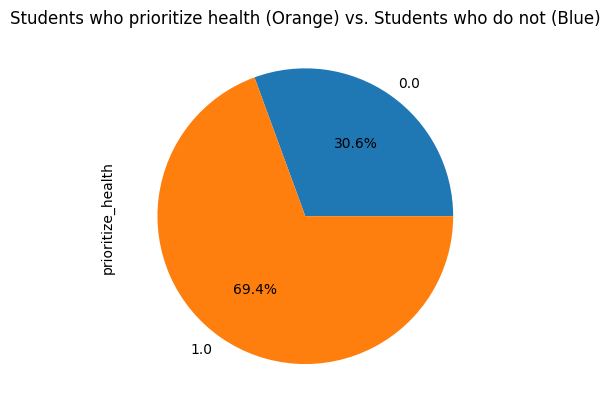

In [4]:
# A pie chart that shows the percentages of students that feel they prioritize health and students that do not.
prioritize_health_number = df.groupby("prioritize_health")["prioritize_health"].count()
prioritize_health_number.plot(kind = 'pie', autopct='%1.1f%%', title = 'Students who prioritize health (Orange) vs. Students who do not (Blue)')
print(prioritize_health_number)

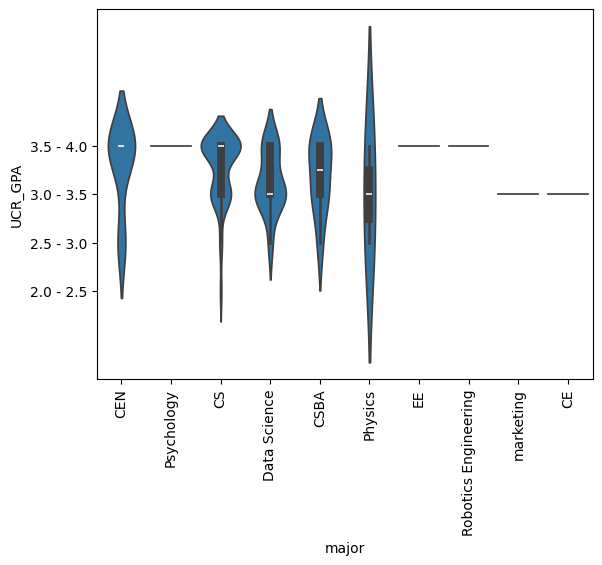

In [26]:
# Violin plot to visualize the distribution of GPA for different majors

# 1. Box Plot (Inner Rectangle): 
#    - The inner rectangle in the center of the violin plot represents the interquartile range (IQR),
#      containing the middle 50% of the data. The line inside the box is the median.

# 2. Violin Shape:
#    - The wider the violin, the higher the probability of data points occurring at that value.
#    - The shape of the violin gives insights into the distribution's characteristics.
#      For example, a wider top and bottom with a narrow middle might indicate a bimodal distribution.

# 3. Kernel Density Plot (Outside the Box): 
#    - The wider part of the violin represents the kernel density estimate of the underlying distribution.
#    - It shows the probability density of the data at different values. Higher peaks indicate
#      where the data is more concentrated.

# Sort the DataFrame by UCR_GPA
df_sorted = df.sort_values(by='UCR_GPA', ascending=False)
sns.violinplot(x='major', y='UCR_GPA', data=df_sorted)
plt.xticks(rotation=90)
plt.show()

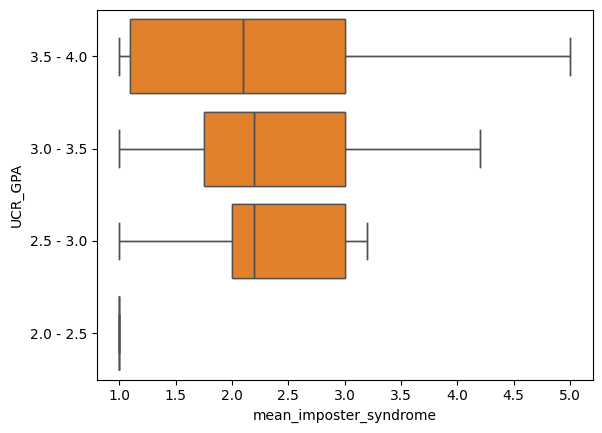

In [24]:
# Boxplot to compare GPA across different class standings

# 1. Box (Interquartile Range - IQR):
#    - The box represents the interquartile range (IQR), containing the middle 50% of the data.
#    - Lower edge (Q1) and upper edge (Q3) show the 25th and 75th percentiles, respectively.
#    - Height of the box (IQR) indicates the spread of the middle 50% of UCR_GPA.

# 2. Line Inside the Box (Median):
#    - The line inside the box represents the median (50th percentile) of UCR_GPA.

# 3. Whiskers:
#    - Whiskers extend from the box to the minimum and maximum values within a certain range.
#    - Points beyond whiskers are potential outliers and plotted individually.

# 4. Outliers (Individual Points):
#    - Individual points outside the whiskers are considered potential outliers.

# Boxplot to compare GPA across different levels of mean imposter syndrome
sns.boxplot(x='mean_imposter_syndrome', y='UCR_GPA', data=df_sorted)
sns.boxplot(x='mean_imposter_syndrome', y='UCR_GPA', data=df)
plt.show()

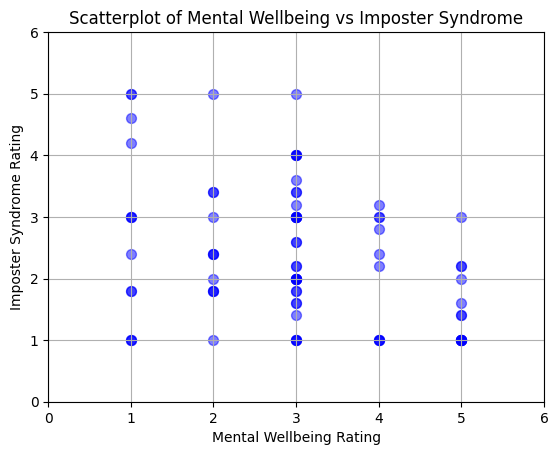

In [29]:
mental_wellbeing_ratings = df['mental_wellbeing']
imposter_syndrome_ratings = df['mean_imposter_syndrome']

plt.scatter(mental_wellbeing_ratings, imposter_syndrome_ratings, alpha=0.5, s=50, color='blue')
plt.title('Scatterplot of Mental Wellbeing vs Imposter Syndrome')
plt.xlabel('Mental Wellbeing Rating')
plt.ylabel('Imposter Syndrome Rating')


plt.xlim(0, 6) 
plt.ylim(0, 6)  

plt.grid(True)  

plt.show()


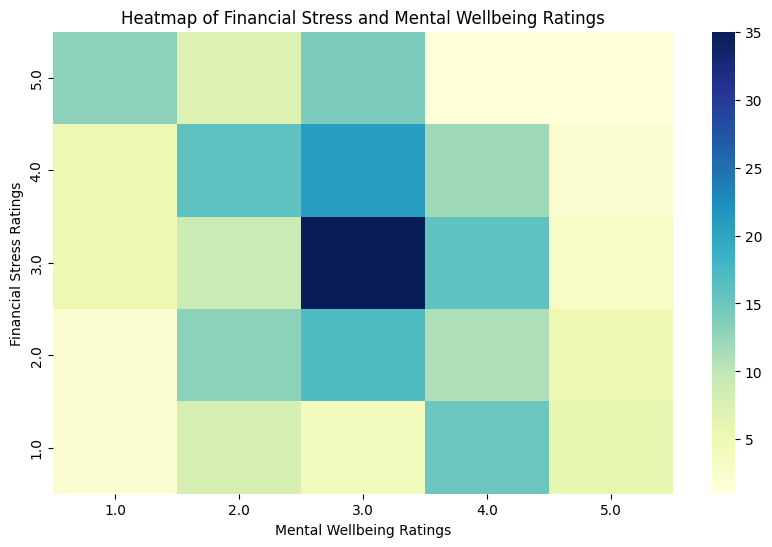

In [7]:
financial_stress_ratings = df['financial_stress']

financial_wellbeing_heatmap = pd.crosstab(df['financial_stress'], df['mental_wellbeing'])


plt.figure(figsize=(10, 6))
sns.heatmap(financial_wellbeing_heatmap[::-1], cmap='YlGnBu')  
plt.title('Heatmap of Financial Stress and Mental Wellbeing Ratings')
plt.xlabel('Mental Wellbeing Ratings')
plt.ylabel('Financial Stress Ratings')
plt.show()


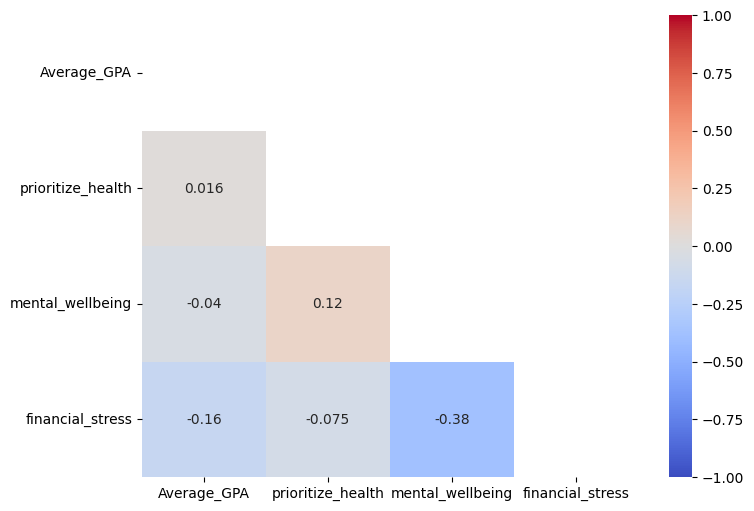

In [15]:
# Correlation heatmap to visualize the correlation matrix
correlation_matrix = df[['Average_GPA', 'prioritize_health', 'mental_wellbeing', 'financial_stress']].corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Correlation heatmap with masked upper triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.show()

### 4. Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis?
- Hypothesis 1: There is a positive correlation between prioritizing health and academic success\
Prediction: Those who prioritize health and have a good mental well being perform better in school\
Test: Calculate the correlation coefficient between responses to health prioritization and UCR cumulative GPA.

- Hypothesis 2: Imposter syndrome negatively impacts mental wellbeing\
Prediction: Those who get imposter syndrome more frequently feel worse about themselves and do worse in school\
Test: Assess the correlation between experiences of imposter syndrome and the current state of mental wellbeing.

- Hypothesis 3: Financial stress negatively influences academic performance\
Prediction: Those who are stressed by finances do worse in school\
Test: Compare the average academic performance (UCR cumulative GPA) between those who report being stressed about their financial situation and those who do not.

### 5. Test your hypotheses.

In [8]:
# Hypothesis 1
# Test 1: point-biserial correlation
# Handling missing values (NaN)
df.dropna(inplace=True)
# Calculate point-biserial correlation coefficient and p-value
correlation_coefficient, p_value = pointbiserialr(df['prioritize_health'], df['Average_GPA'])

# Output the results
print("Hypothesis 1 results: ")
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Print average GPA for each category
average_gpa_by_health_priority = df.groupby('prioritize_health')['Average_GPA'].mean()
print(f"Average GPA for No Health Priority: {average_gpa_by_health_priority[0]}")
print(f"Average GPA for Health Priority: {average_gpa_by_health_priority[1]}")

# Test 2: Chi-squared test
# Convert GPA to a categorical variable
df['GPA_Category'] = pd.cut(df['Average_GPA'], bins=[0, 2.5, 3.0, 3.5, 4.0], labels=['Low', 'Medium', 'High', 'Excellent'])

# Create a contingency table
contingency_table = pd.crosstab(df['prioritize_health'], df['GPA_Category'])

# Chi-squared test
chi2, chi2_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2}")
print(f"P-value (Chi-squared): {chi2_p}\n")


# Hypothesis 2
# 1. Correlation Analysis (Pearson correlation)
# Create a list of imposter syndrome columns for different grade levels
imposter_syndrome_columns = ['imposter_syndrome_freshman', 'imposter_syndrome_sophomore', 'imposter_syndrome_junior', 'imposter_syndrome_senior', 'imposter_syndrome_graduate']

# Calculate the mean imposter syndrome score across grade levels
df['mean_imposter_syndrome'] = df[imposter_syndrome_columns].mean(axis=1)

# Assess the correlation between mean imposter syndrome score and mental wellbeing
pearson_corr_imp = df['mean_imposter_syndrome'].corr(df['mental_wellbeing'])
print("Hypothesis 2 results:")
print(f"Pearson Correlation (Imposter Syndrome vs Mental Wellbeing): {pearson_corr_imp}")

# Create a contingency table for imposter syndrome and academic performance
contingency_table_imp = pd.crosstab(df['mean_imposter_syndrome'], df['Average_GPA'])

# Perform Chi-Squared Test
chi2_stat_imp, p_value_chi2_imp, _, _ = chi2_contingency(contingency_table_imp)

print(f"Chi-Squared Statistic: {chi2_stat_imp}")
print(f"P-value (Chi-Squared Test): {p_value_chi2_imp}")

# Check for significance
if p_value_chi2_imp < 0.05:
    print("There is a significant relationship between mean imposter syndrome and academic performance.\n")
else:
    print("There is no significant relationship between mean imposter syndrome and academic performance.\n")


# Hypothesis 3
# Correlation analysis - Pearson correlation coefficient
pearson_corr_coefficient, pearson_p_value = pearsonr(df['financial_stress'], df['Average_GPA'])
print('Hypothesis 3 results: ')
print(f"Pearson Correlation Coefficient: {pearson_corr_coefficient}")
print(f"P-value (Pearson Correlation): {pearson_p_value}")

# Correlation analysis - Spearman rank correlation coefficient
spearman_corr_coefficient, spearman_p_value = spearmanr(df['financial_stress'], df['Average_GPA'])
print(f"Spearman Correlation Coefficient: {spearman_corr_coefficient}")
print(f"P-value (Spearman Correlation): {spearman_p_value}")



Hypothesis 1 results: 
Correlation Coefficient: 0.01649880022436315
P-value: 0.8801532777476989
Average GPA for No Health Priority: 3.4791666666666665
Average GPA for Health Priority: 3.4919354838709675
Chi-squared value: 0.7287211981566823
P-value (Chi-squared): 0.8664285340490149

Hypothesis 2 results:
Pearson Correlation (Imposter Syndrome vs Mental Wellbeing): -0.3744701129003729
Chi-Squared Statistic: 31.25368707482993
P-value (Chi-Squared Test): 0.9707205828119089
There is no significant relationship between mean imposter syndrome and academic performance.

Hypothesis 3 results: 
Pearson Correlation Coefficient: -0.16320335457062077
P-value (Pearson Correlation): 0.13324566687388287
Spearman Correlation Coefficient: -0.18098280366751388
P-value (Spearman Correlation): 0.09539364764353168


# Hypothesis 1
## Tests Used: Point-Biserial correlation and Chi-Squared test
### Analysis:
- The correlation coefficient of 0.0165 suggests a very weak positive correlation between Health Priority and GPA.
- The p-value for the correlation is 0.8801, which is greater than the conventional significance level of 0.05, indicating that the correlation is not statistically significant.
- The average GPAs for the two groups are close, with 3.479 for No Health Priority and 3.492 for Health Priority. The chi-squared test found no statistically significant difference between the two groups.

### Conclusion: 
There is no significant linear relationship between Health Priority and GPA, and there is no significant difference in average GPA between students with and without Health Priority.

# Hypothesis 2
## Tests Used: Pearson Correlation and Chi-Squared test
### Analysis: 
- The correlation coefficient of -0.3745 indicates a moderate negative correlation between Imposter Syndrome and Mental Wellbeing.
- The Chi-squared value of 31.25 is relatively high, but the p-value of 0.9707 suggests that there is no significant relationship between mean imposter syndrome and academic performance.

### Conclusion:
There is no significant linear relationship between Imposter Syndrome and Mental Wellbeing, and there is no significant association between mean imposter syndrome and academic performance. 

# Hypothesis 3
## Tests Used: Pearson and Spearman correlation
### Analysis: 
- The Pearson correlation coefficient is -0.1632, and the p-value is 0.1332, suggesting a weak negative correlation that is not statistically significant.
- The Spearman correlation coefficient is -0.1810, with a p-value of 0.0954, indicating a weak negative correlation that approaches statistical significance.

### Conclusion:
There is no significant linear relationship between the variables, though the Spearman test suggests a potential trend that is just short of statistical significance. 

### 6. Draw the overall conclusion

# Overall Conclusion
## Health Priority and Academic Performance:
There is no significant correlation between prioritizing health and academic success among college students. Both the point-biserial correlation and the chi-squared test indicated no statistically significant relationship between health prioritization and GPA. The average GPAs for students who prioritize health and those who do not are very close.

## Imposter Syndrome and Mental Wellbeing:
While there is a moderate negative correlation between experiencing imposter syndrome and mental wellbeing, there is no significant association between mean imposter syndrome and academic performance. The chi-squared test found no statistically significant relationship between imposter syndrome and GPA.

## Financial Stress and Academic Performance:
There is no significant linear relationship between financial stress and academic performance, as indicated by both Pearson and Spearman correlation tests. However, the Spearman test suggests a potential trend that is just short of statistical significance.

## Conclusion:
Overall, the current analysis does not strongly support the hypotheses proposed. While some weak correlations were observed, they were not statistically significant. It may have been that other factors beyond those examined in this study may have had a more substantial influence on academic performance among college students. Further research with a larger sample size and consideration of additional variables may have provided deeper insights for the relationship between student health and academic success.